In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, auc

In [2]:
df = pd.read_csv('https://pycourse.s3.amazonaws.com/banknote_authentication.txt', 
                 header = None, 
                 names = ['variance', 'skewness', 'curtosis', 'entropy', 'class' ])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df.shape

(1372, 5)

In [5]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
# Mostra o percentual de dados ausentes por coluna
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending = False)

variance    0.0
skewness    0.0
curtosis    0.0
entropy     0.0
class       0.0
dtype: float64

In [7]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [8]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [9]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [10]:
(df.groupby('class').size() / df['class'].shape[0]) *100

class
0    55.539359
1    44.460641
dtype: float64

In [11]:
df[['skewness', 'curtosis']].corr()

,skewness,curtosis
skewness,1.000000,-0.786895
curtosis,-0.786895,1.000000


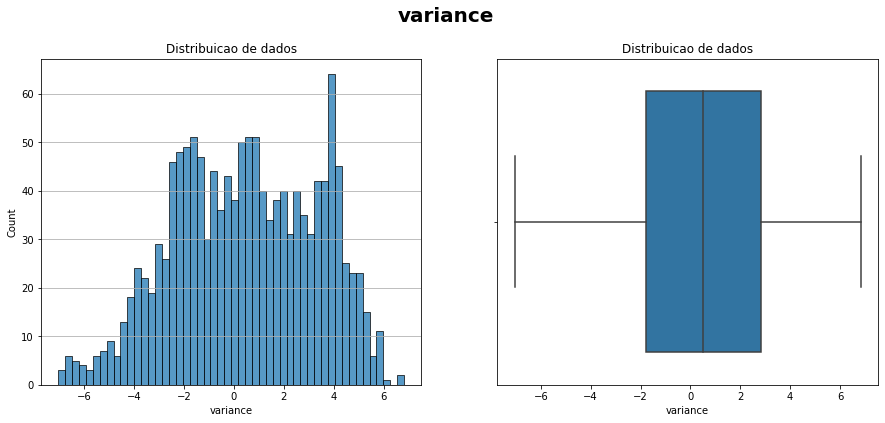

In [12]:
fig, ax = plt.subplots (1,2, figsize = (15,6))
ax[0].set_title(f'Distribuicao de dados')
ax[1].set_title(f'Distribuicao de dados')

fig.suptitle (f'variance', fontsize = 20, fontweight = 'bold', y =1)
sns.histplot(data = df['variance'],bins = 50, ax=ax[0])
ax[0].grid(axis = 'y')


ax = sns.boxplot(x=df['variance'], ax=ax[1])
# ax[1].set_title(f'Distribuicao de dados')
plt.show()

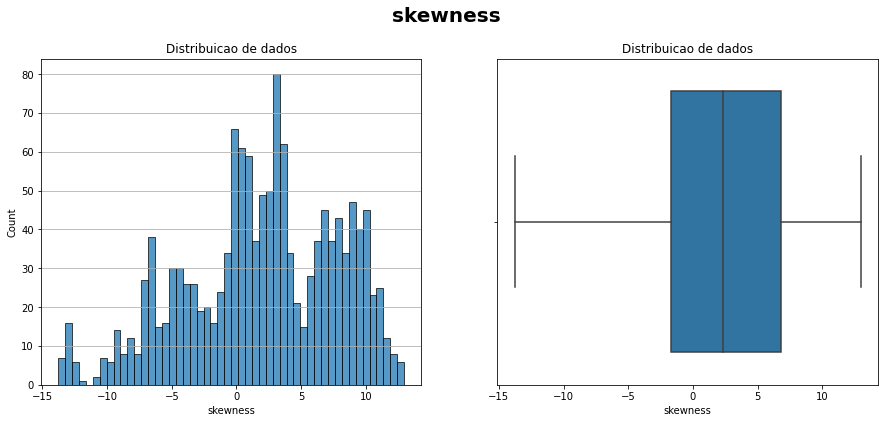

In [13]:
fig, ax = plt.subplots (1,2, figsize = (15,6))
ax[0].set_title(f'Distribuicao de dados')
ax[1].set_title(f'Distribuicao de dados')

fig.suptitle (f'skewness', fontsize = 20, fontweight = 'bold', y =1)
sns.histplot(data = df['skewness'],bins = 50, ax=ax[0])
ax[0].grid(axis = 'y')


ax = sns.boxplot(x=df['skewness'], ax=ax[1])
# ax[1].set_title(f'Distribuicao de dados')
plt.show()

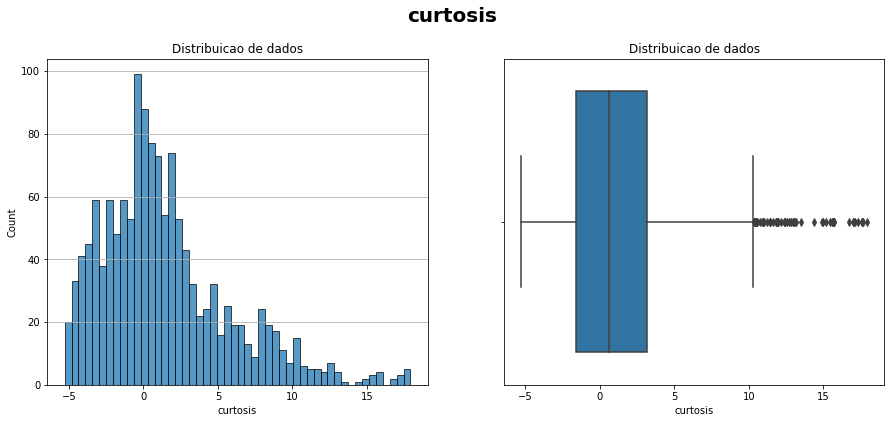

In [14]:
fig, ax = plt.subplots (1,2, figsize = (15,6))
ax[0].set_title(f'Distribuicao de dados')
ax[1].set_title(f'Distribuicao de dados')

fig.suptitle (f'curtosis', fontsize = 20, fontweight = 'bold', y =1)
sns.histplot(data = df['curtosis'],bins = 50, ax=ax[0])
ax[0].grid(axis = 'y')


ax = sns.boxplot(x=df['curtosis'], ax=ax[1])
# ax[1].set_title(f'Distribuicao de dados')
plt.show()

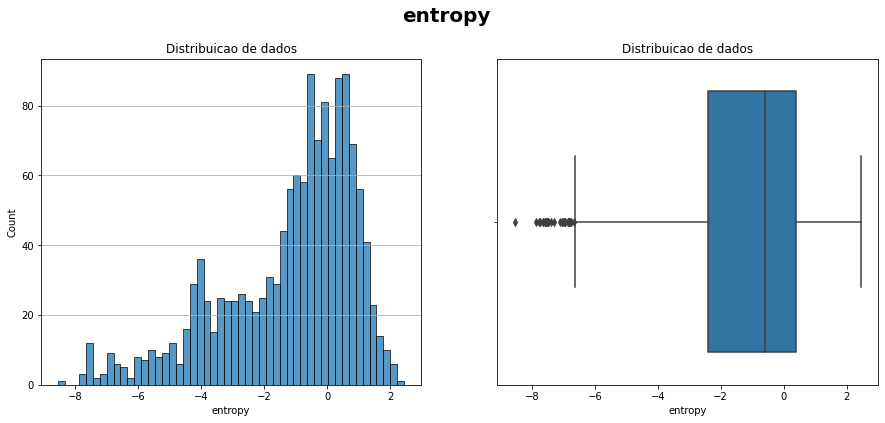

In [15]:
fig, ax = plt.subplots (1,2, figsize = (15,6))
ax[0].set_title(f'Distribuicao de dados')
ax[1].set_title(f'Distribuicao de dados')

fig.suptitle (f'entropy', fontsize = 20, fontweight = 'bold', y =1)
sns.histplot(data = df['entropy'],bins = 50, ax=ax[0])
ax[0].grid(axis = 'y')


ax = sns.boxplot(x=df['entropy'], ax=ax[1])
# ax[1].set_title(f'Distribuicao de dados')
plt.show()

In [16]:
X = df.drop('class', axis=1)
y = df['class']

In [17]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30, 
                                                    random_state=1)

In [19]:
classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(random_state=1),
    RandomForestClassifier(max_depth=8, 
                           random_state=1),
    SVC(gamma='auto', 
        kernel='rbf', 
        random_state=1),
    MLPClassifier(hidden_layer_sizes=(2,), 
                  solver='lbfgs', 
                  random_state=1)
]


for clf in classifiers:

    clf.fit(X_train, y_train)
    # armazenando o nome do modelo na variável name
    name = clf.__class__.__name__
    # imprimindo o nome do modelo
    print("=" * 30)
    print(name)
    # imprimindo os resultados do modelo
    print('****Results****')
    y_pred = clf.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision:', precision_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred))
    print('F1-score:', f1_score(y_test, y_pred))
                                         

KNeighborsClassifier
****Results****
Accuracy: 0.9975728155339806
Precision: 0.9943820224719101
Recall: 1.0
F1-score: 0.9971830985915493
DecisionTreeClassifier
****Results****
Accuracy: 0.9878640776699029
Precision: 0.9777777777777777
Recall: 0.9943502824858758
F1-score: 0.9859943977591036
RandomForestClassifier
****Results****
Accuracy: 0.9951456310679612
Precision: 0.9888268156424581
Recall: 1.0
F1-score: 0.9943820224719102
SVC
****Results****
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
MLPClassifier
****Results****
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [20]:
colunas =  ['variance', 'skewness', 'curtosis', 'entropy']

clf_floresta = RandomForestClassifier(max_depth=8, 
                                      random_state=1)
clf_floresta.fit(X, y)  # Treinando com tudo

features_importance = zip(clf_floresta.feature_importances_, colunas)

for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

variance: 54.398507%
skewness: 24.348844%
curtosis: 15.729681%
entropy: 5.522969%


In [21]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')